# Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime 
from collections import Counter
import collections
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

In [2]:
df= pd.read_csv("Desktop/Tookitaki/train.csv")

In [3]:
pd.options.display.max_columns =30

In [4]:
df.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,NaN,0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Mozilla Firefox,Desktop,0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,NaN,0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Mozilla Firefox,Desktop,0


In [5]:
print(df["siteid"].nunique())
print(df["offerid"].nunique())
print(df["category"].nunique())
print(df["merchant"].nunique())
print(df["countrycode"].nunique())
print(df["browserid"].nunique())
print(df["devid"].nunique())

219173
847510
271
697
6
11
3


In [6]:
df["browserid"].replace("Mozilla Firefox", "Firefox", inplace=True)
df["browserid"].replace("Mozilla", "Firefox", inplace=True)
df["browserid"].replace("InternetExplorer", "IE", inplace=True)
df["browserid"].replace("Internet Explorer", "IE", inplace=True)
df["browserid"].replace("Google Chrome", "Chrome", inplace=True)
df["browserid"].fillna(method="bfill", inplace=True)
df["devid"].fillna(method="bfill", inplace=True)
df["siteid"].fillna(method="ffill", inplace=True)

In [7]:
df.isnull().sum()

ID             0
datetime       0
siteid         0
offerid        0
category       0
merchant       0
countrycode    0
browserid      0
devid          0
click          0
dtype: int64

In [8]:
df['datetime']= pd.to_datetime(df['datetime'])
df['date'] = [d.date() for d in df['datetime']]
df['time'] = [d.time() for d in df['datetime']]

In [9]:
#SITEID
cats=df.pivot_table(index="siteid",columns="click",aggfunc="count",values="countrycode").values
inds=df.pivot_table(index="siteid",columns="click",aggfunc="count",values="countrycode").index

In [10]:
cats[np.isnan(cats)]=0

In [11]:
Counter(cats[:,1]).most_common()

[(1.0, 129791),
 (2.0, 29556),
 (0.0, 23846),
 (3.0, 12435),
 (4.0, 7303),
 (5.0, 4457),
 (6.0, 2952),
 (7.0, 2004),
 (8.0, 1365),
 (9.0, 986),
 (10.0, 727),
 (11.0, 531),
 (12.0, 423),
 (13.0, 347),
 (14.0, 253),
 (15.0, 212),
 (16.0, 176),
 (17.0, 141),
 (18.0, 123),
 (19.0, 113),
 (21.0, 110),
 (20.0, 98),
 (22.0, 77),
 (24.0, 68),
 (23.0, 64),
 (26.0, 57),
 (25.0, 56),
 (28.0, 55),
 (27.0, 54),
 (29.0, 45),
 (30.0, 42),
 (32.0, 35),
 (34.0, 31),
 (36.0, 31),
 (37.0, 29),
 (31.0, 27),
 (42.0, 26),
 (35.0, 24),
 (33.0, 21),
 (38.0, 20),
 (39.0, 18),
 (45.0, 17),
 (40.0, 16),
 (48.0, 15),
 (43.0, 15),
 (41.0, 14),
 (52.0, 13),
 (44.0, 12),
 (61.0, 11),
 (54.0, 11),
 (56.0, 11),
 (47.0, 11),
 (58.0, 10),
 (46.0, 10),
 (50.0, 9),
 (49.0, 9),
 (67.0, 8),
 (65.0, 8),
 (60.0, 8),
 (51.0, 8),
 (63.0, 8),
 (87.0, 8),
 (53.0, 7),
 (55.0, 7),
 (74.0, 7),
 (71.0, 6),
 (62.0, 6),
 (72.0, 6),
 (59.0, 6),
 (70.0, 5),
 (69.0, 5),
 (73.0, 5),
 (94.0, 4),
 (103.0, 4),
 (78.0, 4),
 (96.0, 4),
 (66.0, 

In [12]:
dict_ref1=dict([(i,j) for i,j in zip(inds,cats[:,1])])
df["freq_siteid"]=df["siteid"].apply(lambda l: dict_ref1[l])

In [13]:
df["cat_siteid"]="wow"

In [14]:
def zeb(x):
    if x<=10:
        return("0-10")
    elif 10<x<100:
        return("10-100")
    elif 100<x<1000:
        return("100-1000")
    else:
        return("1000+")

In [15]:
df["cat_siteid"]= df["freq_siteid"].apply(lambda x:zeb(x))

In [16]:
#OFFERID
cats_offerid= df.pivot_table(index="offerid", columns="click",aggfunc="count", values="countrycode").values
inds_offerid= df.pivot_table(index="offerid", columns="click",aggfunc="count", values="countrycode").index

In [17]:
cats_offerid[np.isnan(cats_offerid)]= 0

In [18]:
Counter(cats_offerid[:,1]).most_common()


[(0.0, 682369),
 (1.0, 102885),
 (2.0, 28239),
 (3.0, 11801),
 (4.0, 6376),
 (5.0, 3782),
 (6.0, 2544),
 (7.0, 1746),
 (8.0, 1261),
 (9.0, 947),
 (10.0, 710),
 (11.0, 646),
 (12.0, 466),
 (13.0, 396),
 (14.0, 331),
 (15.0, 290),
 (16.0, 236),
 (17.0, 189),
 (18.0, 185),
 (20.0, 150),
 (19.0, 145),
 (21.0, 120),
 (24.0, 111),
 (22.0, 101),
 (23.0, 95),
 (25.0, 81),
 (26.0, 80),
 (27.0, 75),
 (30.0, 60),
 (29.0, 55),
 (28.0, 54),
 (33.0, 44),
 (31.0, 43),
 (34.0, 38),
 (38.0, 37),
 (32.0, 36),
 (36.0, 33),
 (39.0, 30),
 (35.0, 25),
 (45.0, 25),
 (44.0, 23),
 (41.0, 20),
 (48.0, 20),
 (43.0, 20),
 (42.0, 19),
 (37.0, 19),
 (40.0, 19),
 (52.0, 18),
 (49.0, 17),
 (55.0, 17),
 (47.0, 16),
 (54.0, 15),
 (51.0, 15),
 (61.0, 12),
 (50.0, 11),
 (58.0, 11),
 (59.0, 10),
 (62.0, 9),
 (70.0, 9),
 (46.0, 8),
 (100.0, 8),
 (75.0, 8),
 (56.0, 8),
 (53.0, 8),
 (67.0, 7),
 (63.0, 7),
 (60.0, 7),
 (65.0, 7),
 (64.0, 6),
 (71.0, 6),
 (76.0, 6),
 (57.0, 5),
 (69.0, 5),
 (84.0, 5),
 (73.0, 5),
 (132.0, 4),


In [19]:
dict_ref2=dict([(i,j) for i,j in zip(inds_offerid,cats_offerid[:,1])])
df["freq_offerid"]= df["offerid"].apply(lambda x: dict_ref2[x])

In [20]:
df["cat_offerid"]= "wow"

In [21]:
def web(x):
    if x<=10:
        return("less than 10")
    elif 10<x<100:
        return("10 to 100")
    elif 100<x<1000:
        return("100 to 1000")
    else:
        return("more than 1000")

In [22]:
df["cat_offerid"]= df["freq_offerid"].apply(lambda x: web(x))

In [23]:
#MERCHANT
cats_merchant= df.pivot_table(index="merchant", columns="click", values="countrycode", aggfunc="count").values
inds_merchant= df.pivot_table(index="merchant", columns="click", values="countrycode", aggfunc="count").index

In [24]:
cats_merchant[np.isnan(cats_merchant)]=0

In [25]:
Counter(cats_merchant[:,1]).most_common()

[(30.0, 8),
 (53.0, 7),
 (20.0, 7),
 (22.0, 7),
 (12.0, 6),
 (18.0, 6),
 (19.0, 6),
 (68.0, 6),
 (29.0, 6),
 (14.0, 6),
 (28.0, 6),
 (84.0, 6),
 (37.0, 6),
 (17.0, 5),
 (47.0, 5),
 (95.0, 5),
 (70.0, 5),
 (0.0, 5),
 (35.0, 5),
 (61.0, 5),
 (2.0, 5),
 (23.0, 4),
 (69.0, 4),
 (16.0, 4),
 (65.0, 4),
 (195.0, 4),
 (56.0, 4),
 (182.0, 4),
 (9.0, 4),
 (78.0, 4),
 (3.0, 4),
 (39.0, 4),
 (63.0, 4),
 (42.0, 4),
 (15.0, 4),
 (24.0, 4),
 (10.0, 3),
 (190.0, 3),
 (89.0, 3),
 (166.0, 3),
 (25.0, 3),
 (252.0, 3),
 (62.0, 3),
 (36.0, 3),
 (66.0, 3),
 (127.0, 3),
 (137.0, 3),
 (124.0, 3),
 (138.0, 3),
 (31.0, 3),
 (27.0, 3),
 (54.0, 3),
 (45.0, 3),
 (102.0, 3),
 (38.0, 3),
 (249.0, 3),
 (51.0, 3),
 (100.0, 3),
 (79.0, 3),
 (1.0, 3),
 (335.0, 3),
 (132.0, 3),
 (167.0, 3),
 (8.0, 3),
 (49.0, 3),
 (41.0, 3),
 (21.0, 3),
 (113.0, 3),
 (131.0, 3),
 (106.0, 3),
 (217.0, 3),
 (516.0, 3),
 (310.0, 2),
 (408.0, 2),
 (958.0, 2),
 (292.0, 2),
 (856.0, 2),
 (280.0, 2),
 (244.0, 2),
 (179.0, 2),
 (144.0, 2),
 (13.

In [26]:
def xeb(x):
    if x==1:
        return("1")
    elif x==2:
        return("2")
    elif x==3 or x==4:
        return("3-4")
    else:
        return("more than 4")

In [27]:
df["cat_merchant"]= "wow"

In [75]:
dict_ref3=dict([(i,j) for i,j in zip(inds_merchant,cats_merchant[:,1])])
df["freq_merchant"]= df["merchant"].apply(lambda x: dict_ref3[x])

In [29]:
df["cat_merchant"]= df["freq_merchant"].apply(lambda x: xeb(x))

In [30]:
#CATEGORY
cats_category= df.pivot_table(index="category", columns="click", values="countrycode", aggfunc="count").values
inds_category= df.pivot_table(index="category", columns="click", values="countrycode", aggfunc="count").index

In [31]:
cats_category[np.isnan(cats_category)]=0

In [32]:
Counter(cats_category[:,1]).most_common()

[(131.0, 3),
 (156.0, 3),
 (154.0, 3),
 (146.0, 3),
 (192.0, 2),
 (86.0, 2),
 (252.0, 2),
 (293.0, 2),
 (14.0, 2),
 (491.0, 2),
 (135.0, 2),
 (683.0, 2),
 (148.0, 2),
 (335.0, 2),
 (651.0, 2),
 (417.0, 2),
 (96.0, 2),
 (155.0, 2),
 (115.0, 2),
 (157.0, 2),
 (95.0, 1),
 (1485.0, 1),
 (10126.0, 1),
 (519.0, 1),
 (170.0, 1),
 (10808.0, 1),
 (414.0, 1),
 (2563.0, 1),
 (181.0, 1),
 (106.0, 1),
 (2153.0, 1),
 (3037.0, 1),
 (196.0, 1),
 (162.0, 1),
 (9838.0, 1),
 (201.0, 1),
 (1094.0, 1),
 (45092.0, 1),
 (271.0, 1),
 (1201.0, 1),
 (734.0, 1),
 (1215.0, 1),
 (2607.0, 1),
 (958.0, 1),
 (224.0, 1),
 (3237.0, 1),
 (8517.0, 1),
 (4661.0, 1),
 (900.0, 1),
 (98.0, 1),
 (4625.0, 1),
 (4270.0, 1),
 (512.0, 1),
 (260.0, 1),
 (2332.0, 1),
 (3380.0, 1),
 (362.0, 1),
 (2954.0, 1),
 (4093.0, 1),
 (231.0, 1),
 (1745.0, 1),
 (1566.0, 1),
 (9580.0, 1),
 (134.0, 1),
 (97.0, 1),
 (292.0, 1),
 (1454.0, 1),
 (1278.0, 1),
 (2482.0, 1),
 (2950.0, 1),
 (54.0, 1),
 (753.0, 1),
 (243.0, 1),
 (318.0, 1),
 (278.0, 1),
 

In [33]:
def yeb(x):
    if x==1:
        return("1")
    elif x==2 or x==3:
        return("2-3")

In [34]:
df["cat_category"]= "wow"

In [77]:
dict_ref4=dict([(i,j) for i,j in zip(inds_category,cats_category[:,1])])
df["freq_category"]= df["category"].apply(lambda x: dict_ref4[x])

In [36]:
df["cat_category"]= df["freq_category"].apply(lambda x: yeb(x))

In [37]:
#TIME
cats_time= df.pivot_table(index="time", columns="click", values="countrycode", aggfunc="count").values
inds_time= df.pivot_table(index="time", columns="click", values="countrycode", aggfunc="count").index

In [38]:
cats_time[np.isnan(cats_time)]=0

In [39]:
Counter(cats_time[:,1]).most_common()

[(1.0, 9528),
 (0.0, 7890),
 (2.0, 7766),
 (5.0, 7708),
 (4.0, 7541),
 (6.0, 7395),
 (3.0, 7388),
 (7.0, 6707),
 (8.0, 5661),
 (9.0, 4349),
 (10.0, 3426),
 (11.0, 2621),
 (12.0, 1809),
 (13.0, 1253),
 (14.0, 870),
 (15.0, 562),
 (16.0, 382),
 (17.0, 261),
 (18.0, 183),
 (19.0, 100),
 (20.0, 71),
 (21.0, 46),
 (22.0, 45),
 (23.0, 32),
 (24.0, 24),
 (25.0, 15),
 (27.0, 13),
 (26.0, 12),
 (28.0, 11),
 (29.0, 10),
 (30.0, 8),
 (32.0, 5),
 (37.0, 4),
 (31.0, 4),
 (43.0, 3),
 (33.0, 3),
 (35.0, 2),
 (34.0, 2),
 (59.0, 2),
 (40.0, 2),
 (41.0, 2),
 (49.0, 2),
 (36.0, 1),
 (55.0, 1),
 (48.0, 1),
 (54.0, 1),
 (42.0, 1),
 (60.0, 1),
 (62.0, 1)]

In [40]:
def veb(x):
    if 1<=x<=100:
        return("1-100")
    else:
        return("above 100")

In [41]:
df["cat_time"]= "wow"

In [78]:
dict_ref5=dict([(i,j) for i,j in zip(inds_time,cats_time[:,1])])
df["freq_time"]= df["time"].apply(lambda x: dict_ref5[x])

In [43]:
df["cat_time"]= df["freq_time"].apply(lambda x: veb(x))

In [44]:
df.head()

,ID,datetime,siteid,offerid,category,merchant,countrycode,browserid,devid,click,date,time,freq_siteid,cat_siteid,freq_offerid,cat_offerid,cat_merchant,freq_merchant,cat_category,freq_category,cat_time,freq_time
0,IDsrk7SoW,2017-01-14 09:42:09,4709696.0,887235,17714,20301556,e,Firefox,Desktop,0,2017-01-14,09:42:09,9.0,0-10,5.0,less than 10,more than 4,6583.0,None,9580.0,1-100,6.0
1,IDmMSxHur,2017-01-18 17:50:53,5189467.0,178235,21407,9434818,b,Firefox,Desktop,0,2017-01-18,17:50:53,9.0,0-10,5.0,less than 10,more than 4,697.0,None,2950.0,1-100,11.0
2,IDVLNN0Ut,2017-01-11 12:46:49,98480.0,518539,25085,2050923,a,Edge,Mobile,0,2017-01-11,12:46:49,130.0,100-1000,0.0,less than 10,more than 4,2504.0,None,265.0,1-100,6.0
3,ID32T6wwQ,2017-01-17 10:18:43,8896401.0,390352,40339,72089744,c,Firefox,Mobile,0,2017-01-17,10:18:43,757.0,100-1000,0.0,less than 10,more than 4,385.0,None,10141.0,1-100,9.0
4,IDqUShzMg,2017-01-14 16:02:33,5635120.0,472937,12052,39507200,d,Firefox,Desktop,0,2017-01-14,16:02:33,3.0,0-10,0.0,less than 10,more than 4,677.0,None,4625.0,1-100,9.0


# Dropping Unnecessary Features

In [45]:
df1= df.drop(["category", "merchant", "datetime", "siteid", "offerid","freq_category", "freq_merchant", "freq_time", "freq_siteid", "freq_offerid", "date","time"] , axis=1)

In [46]:
df1.head()

,ID,countrycode,browserid,devid,click,cat_siteid,cat_offerid,cat_merchant,cat_category,cat_time
0,IDsrk7SoW,e,Firefox,Desktop,0,0-10,less than 10,more than 4,None,1-100
1,IDmMSxHur,b,Firefox,Desktop,0,0-10,less than 10,more than 4,None,1-100
2,IDVLNN0Ut,a,Edge,Mobile,0,100-1000,less than 10,more than 4,None,1-100
3,ID32T6wwQ,c,Firefox,Mobile,0,100-1000,less than 10,more than 4,None,1-100
4,IDqUShzMg,d,Firefox,Desktop,0,0-10,less than 10,more than 4,None,1-100


In [47]:
df1.set_index("ID", inplace=True)

In [48]:
target="click"
categorical=["cat_category", "cat_merchant", "countrycode", "browserid", "devid","cat_siteid","cat_offerid", "cat_time"]

In [49]:
df2 = pd.get_dummies(df1[categorical],drop_first=True)

In [50]:
df2.shape

(12137810, 22)

In [51]:
X=df2.values
y=df1[target].values

# Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=1/3, random_state=0)

In [53]:
#METHOD 1
from sklearn.linear_model import LogisticRegression
lr_balanced = LogisticRegression(class_weight = 'balanced')
lr_balanced.fit(X_train,y_train)
y_balanced_pred = lr_balanced.predict(X_test)
print(recall_score(y_test,y_balanced_pred))
print(accuracy_score(y_test,y_balanced_pred))

0.895251291267397
0.8950690532254951


# Random Undersampling

In [54]:
#METHOD 2
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_sample(X, y)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [55]:
len(X_resampled)

874428

# Model Training on Undersampled Data

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=1/3, random_state=0)

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)
print(recall_score(y_test,y_lr_pred))
print(roc_auc_score(y_test,y_lr_pred))

0.8974113926226409
0.8966810303421208


# XG-Boost

In [128]:
from xgboost.sklearn import XGBClassifier
# from sklearn import cross_validation, metrics   
# from sklearn.grid_search import GridSearchCV
model = XGBClassifier(max_depth=5)
model.fit(X_train, y_train)
y_xgb_pred = model.predict(X_test)
print(recall_score(y_test,y_xgb_pred))
print(roc_auc_score(y_test,y_xgb_pred))

0.9142699989686823
0.9028451569166672


C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)
print(recall_score(y_test,y_rfc_pred))
print(roc_auc_score(y_test,y_rfc_pred))

0.9144831379559284
0.9028387367026253


# Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [59]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [140]:
y_pred = clf_gini.predict(X_test)
print(recall_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.887421362026883
0.8547770656932303
0.8548425639698001


# Visualization of Decision Tree

In [60]:
tree.export_graphviz(clf_gini,out_file='tree.dot')   

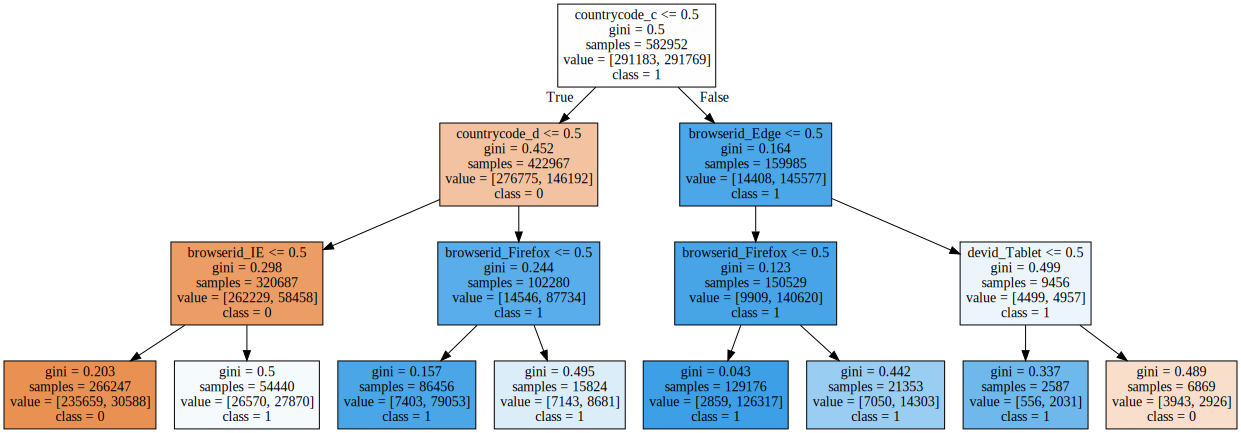

In [139]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(clf_gini, out_file=None
   , feature_names=df2.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# Test Data Pre-processing

In [64]:
df_test = pd.read_csv("Desktop/Tookitaki/test.csv")

In [65]:
df_test["browserid"].replace("Mozilla Firefox", "Firefox", inplace=True)
df_test["browserid"].replace("Mozilla", "Firefox", inplace=True)
df_test["browserid"].replace("InternetExplorer", "IE", inplace=True)
df_test["browserid"].replace("Internet Explorer", "IE", inplace=True)
df_test["browserid"].replace("Google Chrome", "Chrome", inplace=True)
df_test["browserid"].fillna(method="bfill", inplace=True)
df_test["devid"].fillna(method="bfill", inplace=True)
df_test["siteid"].fillna(method="ffill", inplace=True)

In [66]:
print(df["siteid"].nunique())
print(df["offerid"].nunique())
print(df["category"].nunique())
print(df["merchant"].nunique())
print(df["countrycode"].nunique())
print(df["browserid"].nunique())
print(df["devid"].nunique())

219173
847510
271
697
6
6
3


In [67]:
print(df_test["siteid"].nunique())
print(df_test["offerid"].nunique())
print(df_test["category"].nunique())
print(df_test["merchant"].nunique())
print(df_test["countrycode"].nunique())
print(df_test["browserid"].nunique())
print(df_test["devid"].nunique())

84892
556519
267
650
6
6
3


In [68]:
df_test['datetime']= pd.to_datetime(df_test['datetime'])
df_test['date'] = [d.date() for d in df_test['datetime']]
df_test['time'] = [d.time() for d in df_test['datetime']]

In [69]:
def fillnews(x,dict_ref,max1):
    try:
        return dict_ref[x]
    except KeyError:
        return max1

In [70]:
max1=max(list(dict_ref1.values()))
df_test["freq_siteid"]=df_test["siteid"].apply(lambda l: fillnews(l,dict_ref1,max1))

In [71]:
max2=max(list(dict_ref2.values()))
df_test["freq_offerid"]=df_test["offerid"].apply(lambda l: fillnews(l,dict_ref2,max2))

In [79]:
max3=max(list(dict_ref3.values()))
df_test["freq_merchant"]=df_test["merchant"].apply(lambda l: fillnews(l,dict_ref3,max3))

In [80]:
max4=max(list(dict_ref4.values()))
df_test["freq_category"]=df_test["category"].apply(lambda l: fillnews(l,dict_ref4,max4))

In [81]:
max5=max(list(dict_ref5.values()))
df_test["freq_time"]=df_test["time"].apply(lambda l: fillnews(l,dict_ref5,max5))

In [82]:
df_test["cat_siteid"]="wow"
df_test["cat_siteid"]= df_test["freq_siteid"].apply(lambda x:zeb(x))

In [83]:
df_test["cat_offerid"]="wow"
df_test["cat_offerid"]= df_test["freq_offerid"].apply(lambda x:web(x))

In [84]:
df_test["cat_merchant"]="wow"
df_test["cat_merchant"]= df_test["freq_merchant"].apply(lambda x:xeb(x))

In [85]:
df_test["cat_category"]="wow"
df_test["cat_category"]= df_test["freq_category"].apply(lambda x:yeb(x))

In [86]:
df_test["cat_time"]="wow"
df_test["cat_time"]= df_test["freq_time"].apply(lambda x:veb(x))

In [87]:
df_test1= df_test.drop(["category", "merchant", "datetime", "siteid", "offerid","freq_category", "freq_merchant", "freq_time", "freq_siteid", "freq_offerid", "date","time"] , axis=1)

In [88]:
df_test2 = pd.get_dummies(df_test1[categorical],drop_first=True)

# Applying Model On Test Data

In [119]:
df_test["click"] = float('nan')
value = lr.predict_proba(df_test2)
df_test["click"]= value[:,1]
# df_test.set_index("ID", inplace=True)

In [120]:
df_test["click"]

ID
IDFDJVI    0.026769
IDNWkTQ    0.000010
ID9pRmM    0.024603
IDHaQaj    0.009367
IDT2CrF    0.019421
IDFZS6l    0.722613
IDecQv2    0.130035
IDR9hAD    0.006563
IDzZxxC    0.081203
IDqvysv    0.007618
ID0glaO    0.009367
IDtcynu    0.052592
IDFL25i    0.114235
IDOrk16    0.982961
ID9eJOm    0.047240
ID4jcOk    0.000045
IDUymsI    0.010309
ID6pV5P    0.923995
IDIeWTY    0.009367
IDXEp3L    0.026769
IDAARYP    0.151486
IDCCqj3    0.034472
IDMscJr    0.034472
IDu8nxQ    0.413606
IDzYpBs    0.151607
IDh6KmC    0.764252
IDYf7g8    0.187507
IDhj7ih    0.034011
IDB0Gwa    0.081203
IDJ5x0d    0.028089
             ...   
IDwFXmy    0.521624
IDZlb65    0.011958
IDbO1UK    0.007618
ID9mn3P    0.016760
IDlqTi0    0.029408
IDHV5yL    0.972040
IDClkHg    0.019421
IDUHUbN    0.000132
IDMUEyf    0.051240
ID6MyBX    0.486486
IDIn5b1    0.040488
IDRGWT3    0.348667
IDJ3KxL    0.034472
IDA9x1v    0.028089
IDwRynQ    0.538583
IDNoFpa    0.843660
IDk4Vtd    0.005745
ID3oTzG    0.019421
IDWCP6x    0.0512

# Saving csv file

In [122]:
df_test[["click"]].to_csv("Desktop/Tookitaki/submission2.csv")